In [1]:
import numpy as np
import matplotlib.pyplot as plt
import termcolor
exec(open('ProtamineAnalysis.py').read())
exec(open('GenerateDatasets.py').read())

#####################################
#            Alignments             #
#                                   #
# Conserved positions marked with * #
#####################################
Eutherian P1 Sperm Protamines
                         10         20         30         40         50         60
                 *    **          *            *        **           **          *     
HSP1_CAPHI       MARYRCCLTH --SRSRCR-R ---RRRRRCR -RRRRRFGRR --RRR-RVCC RRY--TVVRC TRQ- 
HSP1_SHEEP       MARYRCCLTH --SRSRCR-R ---RRRRRCR -RRRRRFGRR --RRR-RVCC RRY--TVVRC TRQ- 
HSP1_BOVIN       MARYRCCLTH --SGSRCR-R ---RRRRRCR -RRRRRFGRR --RRR-RVCC RRY--TVIRC TRQ- 
HSP1_PIG         MARYRCCRSH --SRSRCR-P ---R-RRRCR -RRRRRCCPR --RRR-AVCC RRY--TVIRC RRC- 
HSP1_HORSE       MARYRCCRSQ --SQSRCR-R ---RRRRRCR -RRRRRSVRQ --RR---VCC RRY--TVLRC RRRR 
HSP1_ORCOR       MARNR-CRSP --SQSRCR-R ---P-RRRCR --RRIRCCRR --QR--RVCC RRY--TTTRC ARQ- 
HSP1_MOUSE       MARYRCCRSK --SRSRCR-R ---R-RRRCR -RRRRRCCRR --RR--RRCC RRR

PRTB_ACIGU       --ARRRRRSS RPQRRRRR-- -----RRHGR RRRGRR 
PRTB_ACIST       --ARRRRRSS RPQRRRRR-- -----RRHGR RRRGRR 
PRTY1_CLUHA      --ARRRRSSS RPIRRRRPRR RT---TRRRR AGRRRR 
PRTY1_CLUPA      --ARRRRSSS RPIRRRRPRR RT---TRRRR AGRRRR 
PRT1_ESOLU       -PRRRRASSG RPVRRRRRP- KMS--RRRRR GGRRRR 
PRTZ_CLUPA       ARRRRSRRAS RPVRRRRPR- RVS--RRRR- -ARRRR 
PRTZ_CLUHA       ARRRRSRRAS RPVRRRRPR- RVS--RRRR- -ARRRR 
PRT4_ONCMY       -MPRRRR-AS RRIRRRRRP- RVS--RRRRG GRRRRR 
PRTY2_CLUPA      -PRRRTRRAS RPVRRRRPR- RVS--RRRR- -ARRRR 
PRTY2_CLUHA      -PRRRTRRAS RPVRRRRPR- RVS--RRRR- -ARRRR 
PRT3A_ONCMY      -PRRRRRSSS RPIRRRRRP- RVS--RRRRR GGRRRR 
PRTIB_ONCMY      PRRRRRRSSS RPIRRRRPR- RVS--RRRRR GGRRRR 
PRT1B_ONCMY      -MPRRRR-AS RRIRRRRRP- RVS--RRRRR GGRRRR 
PRT1A_ONCMY      -MPRRRR-AS RRVRRRRRP- RVS--RRRRR GGRRRR 
PRTC3_ONCMY      -MPRRRR-AS RPVRRRRRP- RVS--RRRRR GGRRRR 
PRT2C_ONCMY      -MPRRRRSSR RPVRRRRRP- RVSR-RRRRR GGRRRR 
PRT14_ONCMY      -MPRRRRSSR PPVRRRRRP- RVSR-RRRRR GGRRRR 
PRT2_ONCMY    

FileNotFoundError: [Errno 2] No such file or directory: '/usr/bin/muscle3.8.31_i86linux64': '/usr/bin/muscle3.8.31_i86linux64'

In [ ]:
print(e_p1_list[1]['_ID'],e_p1_list[1]['_SQ'])
#AAABBBBBBBAA
b_count=7
e_p1_list

In [ ]:
#ep1_align.print_alignment_2(line_len=80)
def remove_position_with_excess_dash(protamine_sequence):
#remove positions where at least 40% is just dash (-), so set below variable at 0.4
#this is for ALIGNED sequences
    removal_fraction=0.4
    aligned_sequence_array=np.array([])
    j=0
    for sequence in protamine_sequence:
        temp_sequence_array=np.array([])
        for position in sequence:
            if position == '-':
                temp_sequence_array=np.append(temp_sequence_array,1)
            else:
                temp_sequence_array=np.append(temp_sequence_array,0)
        if j==0:
            aligned_sequence_array=temp_sequence_array
        elif j!=0:
            aligned_sequence_array=np.vstack((aligned_sequence_array,temp_sequence_array))
        j+=1
    positions_for_removal_bool=np.sum(aligned_sequence_array,axis=0)/len(aligned_sequence_array)>=removal_fraction
    j=0
    for sequence in protamine_sequence:
        modified_sequence=np.array(sequence)[[~(positions_for_removal_bool)]]
        if j==0:
            sequence_list_with_positions_removed=modified_sequence
        else:
            sequence_list_with_positions_removed=np.vstack((sequence_list_with_positions_removed,modified_sequence))
        j+=1
    return sequence_list_with_positions_removed

In [9]:
#count_chars_arg misses terminal arginine
def count_chars_arg(txt):
    result = 0
    for i,char in enumerate(txt):
        if char=='R' and i<len(txt)-1:
            result += 1    
    return result
def count_chars_nonarg(txt):
    result = 0
    for i,char in enumerate(txt):
        if char!='R' and i<len(txt)-1:
            result += 1    
    return result
def aa_count(txt):
    result=0
    i=0
    j=0
    for i,char in enumerate(txt):
        if char=='R' and i<len(txt)-1:
            if txt[i+1]=='R':
                result+=1
    return result
def aa_count_rk(txt):
    result=0
    i=0
    j=0
    for i,char in enumerate(txt):
        if (char=='R' or char=='K') and i<len(txt)-1:
            if txt[i+1]=='R' or txt[i+1]=='K':
                result+=1
    return result
def bb_count(txt):
    result=0
    i=0
    j=0
    for i,char in enumerate(txt):
        if char!='R' and i<len(txt)-1:
            if txt[i+1]!='R':
                result+=1
    return result
def order_parameter(txt):
    aa=aa_count(txt)
    bb=bb_count(txt)
    a_count=count_chars_arg(txt)
    b_count=count_chars_nonarg(txt)     
    Paa=aa/a_count
    Pbb=bb/b_count
    lambda_order_parameter=Paa+Pbb-1
    return lambda_order_parameter
    

In [8]:
salmon='MPRRRRSSSRPVRRRRRPRVSRRRRRRGGRRRR'
order_parameter(salmon)

aa= 15
bb= 6
a_count= 20
b_count= 12


0.25

In [ ]:
def count_charge(txt):
    result = 0
    for char in txt:
        if char=='K' or char=='R' or char=='H':
            result += 1
        if char=='D' or char=='E':
            result = result - 1
    return result

In [4]:
#all sequences
def sequence_order_parameter(protamine_sequence):
    order_p=list()
    for sequence in range(0,len(protamine_sequence)):
        order_p.append(order_parameter(protamine_sequence[sequence]['_SQ']))
    return order_p
def sequence_order_parameter_bindingregion(protamine_sequence,list_of_aligned_sequence):
#binding region according to christian powell paper is positions 17 to 46 for ALIGNED eutherian p1 sequences
#ALIGNED sequences are each 64 positions total
#i apply below function to non-aligned sequences, so i set my upper bound and lower bound for binding region,-
# - by taking two fractions 17/64 and 46/64 and applying these as lower & upper bound for non-aligned sequence
    order_p=list()
    powell_lower_bound_for_aligned_sequence=18
    powell_upper_bound_for_aligned_sequence=50
#below variable (powell_total_length_aligned_sequence) is made
#by taking length of a single sequence in list of aligned sequences with unnecessary positions removed
    powell_total_length_of_aligned_sequence=len(list_of_aligned_sequence[0])
    powell_lower_fraction=powell_lower_bound_for_aligned_sequence/powell_total_length_of_aligned_sequence
    powell_upper_fraction=powell_upper_bound_for_aligned_sequence/powell_total_length_of_aligned_sequence
    for sequence in range(0,len(protamine_sequence)):
        lower_bound=round(powell_lower_fraction*len(protamine_sequence[sequence]['_SQ']))
        upper_bound=round(powell_upper_fraction*len(protamine_sequence[sequence]['_SQ']))
#        print(e_p1_list[sequence]['_SQ'][0:lower_bound]+termcolor.colored(e_p1_list[sequence]['_SQ'][lower_bound:(upper_bound+1)],color='yellow',on_color='on_grey')+e_p1_list[sequence]['_SQ'][(upper_bound+1):len(e_p1_list[sequence]['_SQ'])])
        order_p.append(order_parameter(protamine_sequence[sequence]['_SQ'][lower_bound:upper_bound]))
    return order_p

The average for whole fish is 0.21017050544914323
The average for binding region of p1 is 0.13773729689524494
The average for whole eutherian p1 sequences is 0.0015294459327693738


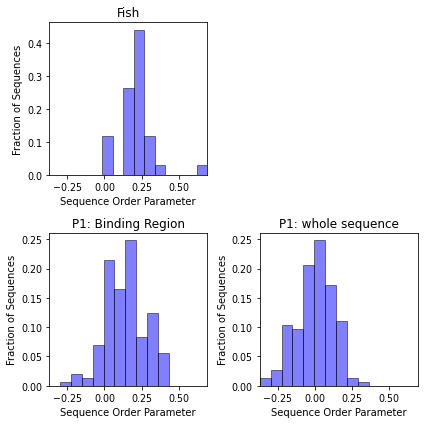

In [11]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(6,6))
p1_sequence_order_parameter_bindingregion=sequence_order_parameter_bindingregion(e_p1_list,ep1_align.alignment_matrix)
fish_sequence_order_parameter=sequence_order_parameter(fish_list)
p1_sequence_order_parameter=sequence_order_parameter(e_p1_list)
x_lim_min = min([min(fish_sequence_order_parameter),min(p1_sequence_order_parameter),min(p1_sequence_order_parameter_bindingregion)])
x_lim_max = max([max(fish_sequence_order_parameter),max(p1_sequence_order_parameter),max(p1_sequence_order_parameter_bindingregion)])
ax[0,0].hist(fish_sequence_order_parameter,
                color='blue',
                    alpha=0.5,
                edgecolor='black',density=False,
        weights=np.ones(len(fish_sequence_order_parameter)) / len(fish_sequence_order_parameter),label='Fish')
ax[0,0].set_xlabel('Sequence Order Parameter',fontsize=10)
ax[0,0].set_ylabel('Fraction of Sequences',fontsize=10)
plt.setp(ax[0,0].get_xticklabels(),fontsize=9.5)
plt.setp(ax[0,0].get_yticklabels(),fontsize=9.5)
#ax[0,0].text(.92,.93,'Fish',fontsize=9,
#        horizontalalignment='center',
#        transform=ax[0,0].transAxes)
ax[0,0].set_xlim(x_lim_min,x_lim_max)
ax[0,0].set_title('Fish')
ax[1,0].hist(p1_sequence_order_parameter_bindingregion,
                color='blue',
                    alpha=0.5,
                edgecolor='black',density=False,
         weights=np.ones(len(p1_sequence_order_parameter_bindingregion)) / len(p1_sequence_order_parameter_bindingregion),label='Eutherian P1')
ax[1,0].set_xlabel('Sequence Order Parameter',fontsize=10)
ax[1,0].set_ylabel('Fraction of Sequences',fontsize=10)
plt.setp(ax[1,0].get_xticklabels(),fontsize=9.5)
plt.setp(ax[1,0].get_yticklabels(),fontsize=9.5)
#ax[1,0].text(.8,.93,'Eutherian P1',fontsize=9,
#        horizontalalignment='center',
#        transform=ax[1,0].transAxes)
#ax[1,0].text(.76,.83,'Binding Region',fontsize=9,
#        horizontalalignment='center',
#        transform=ax[1,0].transAxes)
ax[1,0].set_title('P1: Binding Region')
ax[1,0].set_xlim(x_lim_min,x_lim_max)
ax[1,1].hist(p1_sequence_order_parameter,
                color='blue',
                    alpha=0.5,
                edgecolor='black',density=False,
         weights=np.ones(len(p1_sequence_order_parameter)) / len(p1_sequence_order_parameter),label='Eutherian P1')
ax[1,1].set_xlabel('Sequence Order Parameter',fontsize=10)
ax[1,1].set_ylabel('Fraction of Sequences',fontsize=10)
plt.setp(ax[1,1].get_xticklabels(),fontsize=9.5)
plt.setp(ax[1,1].get_yticklabels(),fontsize=9.5)
#ax[1,1].text(.8,.93,'Eutherian P1',fontsize=9,
#        horizontalalignment='center',
#        transform=ax[1,1].transAxes)
#ax[1,1].text(.83,.83,'Whole Seq',fontsize=9,
#        horizontalalignment='center',
#        transform=ax[1,1].transAxes)
ax[1,1].set_title('P1: whole sequence')
ax[1,1].set_xlim(x_lim_min,x_lim_max)
print('The average for whole fish is',
      sum(fish_sequence_order_parameter)/len(fish_sequence_order_parameter))
print('The average for binding region of p1 is',
      sum(p1_sequence_order_parameter_bindingregion)/len(p1_sequence_order_parameter_bindingregion))
print('The average for whole eutherian p1 sequences is',
      sum(p1_sequence_order_parameter)/len(p1_sequence_order_parameter))
ax[0,1].remove()
fig.tight_layout()



In [37]:
#this is for eutherian P1 sequences only, based on aligned eutherian p1 on powell paper
lower_bound_aligned=17
upper_bound_aligned=46
for sequence in ep1_align.alignment_matrix:
    sequence=''.join(sequence)
    print(sequence[0:lower_bound_aligned]+termcolor.colored(sequence[lower_bound_aligned:(upper_bound_aligned+1)],color='yellow',on_color='on_grey')+sequence[(upper_bound_aligned+1):len(sequence)])
    

MARHRCCRSR--SQSRSR-R--DRQKRRCR-TPRRRSCRR--RTA-RRCGRRR--YKPRCRRN-
MARYSCCRSH--SRSRSR-R---R-RQRCR-RRRRRSCGR--RR--RACYRRYTVRYRRRRRRR
MARYRCCRSH--SRSRCR-R---R-RRRSR-RRRRRSCGR--RR--RAGYRRY---TVRYRRRR
MARYRCCLTH--SRSRCRPR---RRRRRCR-KLRRRFCRR-PRR--RVCCRRY--TAIRCTR--
MARYRCRLTH--SRSGCR-R---RRRRRCR-RRRRRFCRR--RRR-RVCCRRY--TVVRCTRQ-
MARYRCCLTH--SRSRCR-R---RRRRRCR-RRRRRFGRR--RRR-RVCCRRY--TVVRCTRQ-
MARYRCCLTH--SRSRCR-R---RRRRRCR-RRRRRFGRR--RRR-RVCCRRY--TVVRCTRQ-
MARYRCCLTH--SRSRCR-R---RRRRRCR-RRRRRFGRR--RRR-RVCCRRY--TVVRCTRQ-
MARYRCCLTH--SGSRCR-R---RRRRRCR-RRRRRFGRR--RRR-RVCCRRY--TVIRCTRQ-
MARYRCCLTH--SGSRCR-R---RRRRRCR-RRRRRFGRR--RRR-RVCCRRY--TVIRCTRQ-
MARYRCCLTH--SGSRCR-R---RRRRRCR-RRRRRFGRR--RR-------RR-----------
MARNRCCRSQ--SRSRCR-R---P-KRGCR-SRRRRCYQR--RR--RVCCRRY--TTIRCARQ-
MARNRCCRSQ--SRSRCR-R---P-RRRCR-SPRRRRYQR--RR--RVCCRRY--TVTRCARQ-
MARNRCCRSQ--SRGRCR-R---P-RRRCR-SPKRRRYQR--RR--RVCCRRS--ATMRCASQ-
MARNRCCRSQ--SRGRCR-R---P-RRRYR-SPRRRRYQR--RR--RVCCRRS--TTMRCASQ-
MARYRCCRSH--SRSRCR-P---R-

In [7]:
p1_sequence_order_parameter=sequence_order_parameter(e_p1_list)
plt.hist(p1_sequence_order_parameter,
                color='violet',
                    alpha=0.5,
                edgecolor='black',density=False)
plt.title('Eutherian P1',fontsize=25)
plt.xlabel('Sequence Order Parameter',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
print('The average is',sum(p1_sequence_order_parameter)/len(p1_sequence_order_parameter))
plt.savefig('figures_for_publication/p1_seq_order_param_frequency.png',dpi=400,bbox_inches='tight')

The average is 0.0015294459327693738


The average is 0.0015294459327693738


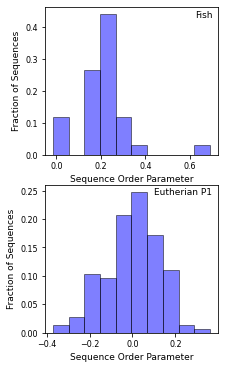

In [7]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(3.1,6))
p1_sequence_order_parameter=sequence_order_parameter(e_p1_list)
fish_sequence_order_parameter=sequence_order_parameter(fish_list)
ax[0].hist(fish_sequence_order_parameter,
                color='blue',
                    alpha=0.5,
                edgecolor='black',density=False,
        weights=np.ones(len(fish_sequence_order_parameter)) / len(fish_sequence_order_parameter),label='Fish')
ax[0].set_xlabel('Sequence Order Parameter',fontsize=9)
ax[0].set_ylabel('Fraction of Sequences',fontsize=9)
plt.setp(ax[0].get_xticklabels(),fontsize=8)
plt.setp(ax[0].get_yticklabels(),fontsize=8)
ax[0].text(.92,.93,'Fish',fontsize=9,
        horizontalalignment='center',
        transform=ax[0].transAxes)

ax[1].hist(p1_sequence_order_parameter,
                color='blue',
                    alpha=0.5,
                edgecolor='black',density=False,
         weights=np.ones(len(p1_sequence_order_parameter)) / len(p1_sequence_order_parameter),label='Eutherian P1')
ax[1].set_xlabel('Sequence Order Parameter',fontsize=9)
ax[1].set_ylabel('Fraction of Sequences',fontsize=9)
plt.setp(ax[1].get_xticklabels(),fontsize=8)
plt.setp(ax[1].get_yticklabels(),fontsize=8)
ax[1].text(.8,.93,'Eutherian P1',fontsize=9,
        horizontalalignment='center',
        transform=ax[1].transAxes)

print('The average is',sum(p1_sequence_order_parameter)/len(p1_sequence_order_parameter))
#plt.savefig('figures_for_publication/overall_seq_order_param.png',dpi=400,bbox_inches='tight')

In [177]:
remove_position_with_excess_dash(ep1_align.alignment_matrix)

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


array([['M', 'A', 'R', ..., 'R', 'R', 'N'],
       ['M', 'A', 'R', ..., 'R', 'R', 'R'],
       ['M', 'A', 'R', ..., 'R', 'R', 'R'],
       ...,
       ['M', 'A', 'R', ..., 'R', 'K', 'H'],
       ['M', 'A', 'R', ..., 'R', 'R', 'H'],
       ['M', 'A', 'R', ..., 'R', 'R', 'H']], dtype='<U1')

In [34]:
import numpy as np
np.array(p1_sequence_order_parameter).max()

0.36190476190476195

The average is 0.21017050544914323


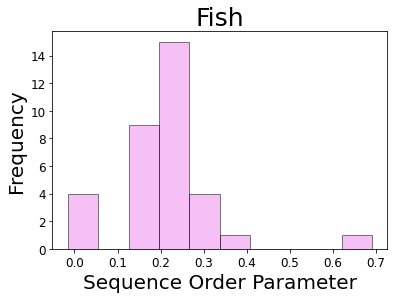

In [9]:
fish_sequence_order_parameter=sequence_order_parameter(fish_list)
plt.hist(fish_sequence_order_parameter,
                color='violet',
                    alpha=0.5,
                edgecolor='black',density=False)
plt.title('Fish',fontsize=25)
plt.xlabel('Sequence Order Parameter',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
print('The average is',sum(fish_sequence_order_parameter)/len(fish_sequence_order_parameter))
plt.savefig('figures_for_publication/fish_seq_order_param.png',dpi=400,bbox_inches='tight')

The average is 0.21017050544914323


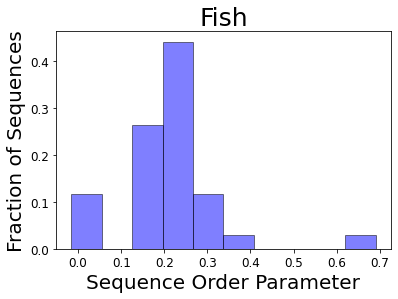

In [10]:
fish_sequence_order_parameter=sequence_order_parameter(fish_list)
plt.hist(fish_sequence_order_parameter,
                color='blue',
                    alpha=0.5,
                edgecolor='black',density=False,
        weights=np.ones(len(fish_sequence_order_parameter)) / len(fish_sequence_order_parameter))
plt.title('Fish',fontsize=25)
plt.xlabel('Sequence Order Parameter',fontsize=20)
plt.ylabel('Fraction of Sequences',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
print('The average is',sum(fish_sequence_order_parameter)/len(fish_sequence_order_parameter))
plt.savefig('figures_for_publication/fish_seq_order_param.png',dpi=400,bbox_inches='tight')

In [32]:
np.array(fish_sequence_order_parameter).max()

0.6904761904761905

In [6]:
human_p1='ARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMRCCRPRYRPRCRRH'
bull_p1='ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR'
salmon='MPRRRRSSSRPVRRRRRPRVSRRRRRRGGRRRR'
print('Sequence Order parameters:')
print('salmon   =',order_parameter(salmon),'\nhuman P1 =',format(order_parameter(human_p1),'0.2f'),'\nbull P1  =',format(order_parameter(bull_p1),'0.2f'))
print('Number of arginines:')
print('salmon   =',count_chars_arg(salmon),'\nhuman P1 =',count_chars_arg(human_p1),'\nbull P1  =',count_chars_arg(bull_p1))

Sequence Order parameters:
salmon   = 0.25 
human P1 = -0.31 
bull P1  = 0.28
Number of arginines:
salmon   = 20 
human P1 = 24 
bull P1  = 26


In [21]:
count_block_length_number(human_p1)

(1.5, 16)

In [12]:
print('Sequence Order parameters:\tNumber of arginines:')
print('salmon   =',order_parameter(salmon),'\t\t','salmon   =',count_chars_arg(salmon),'\nhuman P1 =',format(order_parameter(human_p1),'0.2f'),'\t\t','human P1 =',count_chars_arg(human_p1),'\nbull P1  =',format(order_parameter(bull_p1),'0.2f'),'\t\t','bull P1  =',count_chars_arg(bull_p1))

Sequence Order parameters:	Number of arginines:
salmon   = 0.25 		 salmon   = 20 
human P1 = -0.31 		 human P1 = 24 
bull P1  = 0.28 		 bull P1  = 26


In [13]:
print('The number of arginines in human P1 is',count_chars_arg('ARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMRCCRPRYRPRCRRH'))
print('The number of arginines in bull P1 is',count_chars_arg('MARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCTRQ'))
print('The number of arginines in salmon is',count_chars_arg('MPRRRRSSSRPVRRRRRPRVSRRRRRRGGRRRR'))

The number of arginines in human P1 is 24
The number of arginines in bull P1 is 26
The number of arginines in salmon is 20


In [3]:
print('The charge density in human P1 is',count_charge('ARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMRCCRPRYRPRCRRH')/len('ARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMRCCRPRYRPRCRRH'))
print('The charge density in bull P1 is',count_charge('ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR')/len('ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR'))
print('The charge density in salmon is',count_charge('MPRRRRSSSRPVRRRRRPRVSRRRRRRGGRRRR')/len('MPRRRRSSSRPVRRRRRPRVSRRRRRRGGRRRR'))

The charge density in human P1 is 0.5
The charge density in bull P1 is 0.5714285714285714
The charge density in salmon is 0.6363636363636364


In [16]:
print('The number of blocks in human P1 is',count_arg_blocks('ARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMRCCRPRYRPRCRRH'))
print('The number of blocks in bull P1 is',count_arg_blocks('MARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCTRQ'))
print('The number of blocks in salmon is',count_arg_blocks('MPRRRRSSSRPVRRRRRPRVSRRRRRRGGRRRR'))

The number of blocks in human P1 is [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 3, 3, 3, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0]
The number of blocks in bull P1 is [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 7, 7, 7, 7, 7, 7, 7, 0, 6, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 6, 6, 6, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0]
The number of blocks in salmon is [0, 0, 4, 4, 4, 4, 0, 0, 0, 1, 0, 0, 5, 5, 5, 5, 5, 0, 1, 0, 0, 6, 6, 6, 6, 6, 6, 0, 0, 4, 4, 4, 4]


In [9]:
p2a='RTHGQSHYRRRHCSRRRLHRIHRRQHRSCRRRKRRSCRHRRRHRRGCRTRKRTCRRH'
print('Sequence Order parameters:')
print('P2a= ', order_parameter(p2a))
print('Number of arginines:')
print('P2a= ',count_chars_arg(p2a))

Sequence Order parameters:
P2a=  -0.03831417624521072
Number of arginines:
P2a=  27


In [14]:
#protamine_sequence='MARYRCCRSRSRCRRRRRRCYRRRRRCCRRRRRRVCCRRYTVIRCRRR'
#look at example in above line. protamine_sequence is a single sequence. 
def count_arg_blocks(protamine_sequence):
    import numpy as np
    arg_length=[]
    i=0
    j=0
    k=1
    while j<=len(protamine_sequence)-2 and k<=len(protamine_sequence):
        if protamine_sequence[j]=='R' and protamine_sequence[j+1]=='R':
            count_arg=0
            i=j
            while protamine_sequence[i]=='R':
                count_arg=count_arg+1
                i=i+1
                if i>(len(protamine_sequence)-1):
                        break
            arg_length.extend([count_arg]*count_arg)
            j=i
        elif protamine_sequence[j]=='R' and protamine_sequence[j+1]!='R':
            arg_length.append(1)
            j=j+1
        elif protamine_sequence[j]=='-':
            arg_length.append(np.nan)
            j=j+1
        else:
            arg_length.append(0)
            j=j+1
        k=k+1
    if protamine_sequence[len(protamine_sequence)-1]=='R' and protamine_sequence[len(protamine_sequence)-2]!='R':
        arg_length.append(1)
#    elif protamine_sequence[len(protamine_sequence)-1]=='-' and protamine_sequence[len(protamine_sequence)-2]!='R':
#        arg_length.append(np.nan)
#    elif protamine_sequence[len(protamine_sequence)-1]=='-' and protamine_sequence[len(protamine_sequence)-2]=='R':
#        arg_length.append(np.nan)
#    elif protamine_sequence[len(protamine_sequence)-1]!='R' and protamine_sequence[len(protamine_sequence)-2]!='R' and protamine_sequence[len(protamine_sequence)-1]!='-':
#        arg_length.append(0)
    elif protamine_sequence[len(protamine_sequence)-1]=='-':
        arg_length.append(np.nan)
    elif protamine_sequence[len(protamine_sequence)-1]!='R':
        arg_length.append(0)
    return arg_length

In [15]:
def count_block_length_number(protamine_sequence):
    unique_nos=[]
    k=0
    for i in count_arg_blocks(protamine_sequence):
        if i==1:
            unique_nos.append(1)
        elif i!=0 and i!=1 and k>0 and count_arg_blocks(protamine_sequence)[k-1]==0:
            unique_nos.append(i)
        elif i!=0 and i!=1 and k==0:
            unique_nos.append(i)
        k+=1
    average_block_length=sum(unique_nos)/len(unique_nos)
    total_no_of_blocks=len(unique_nos)
    return average_block_length, total_no_of_blocks

In [18]:
print('In my human P1 sequence, the average block length:',count_block_length_number(human_p1)[0],'and total # of blocks',count_block_length_number(human_p1)[1])
print('In my   salmon sequence, the average block length:',count_block_length_number(salmon)[0],'and total # of blocks',count_block_length_number(salmon)[1])
print('In my  bull P1 sequence, the average block length:',format(count_block_length_number(bull_p1)[0],'0.1f'),'and total # of blocks',count_block_length_number(bull_p1)[1])

In my human P1 sequence, the average block length: 1.5 and total # of blocks 16
In my   salmon sequence, the average block length: 3.5 and total # of blocks 6
In my  bull P1 sequence, the average block length: 3.0 and total # of blocks 9
